In [ ]:
# 일자별 차트 크롤링
# 1등 가져오기
# 전체 순위가져 오기 

In [ ]:
# !pip install matplotlib

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [ ]:
url = "https://music.bugs.co.kr/chart/track/day/total?chartdate=" 
url = url + str(20221204)

html = requests.get(url)
soup = bs(html.text, "html.parser")

bugs_day=[]
tbody=soup.find("tbody")
tr_soup=tbody.find_all("tr")

for tr in tr_soup:
    rank=tr.find("div", class_="ranking").get_text().split("\n")[1]
    title=tr.find("p", class_="title").get_text().replace("\n", "")
    art=tr.find("p", class_="artist").get_text().replace("\n", "")
    album=tr.find("a", class_="album").get_text().replace("\n", "")
    bugs_day.append([rank, title, art, album])
    
# bugs_day
df=pd.DataFrame(bugs_day, columns=["순위", "곡명", "아티스트", "앨범"])
df

,순위,곡명,아티스트,앨범
0,1,사건의 지평선,윤하(Younha/ユンナ),YOUNHA 6th Album Repackage 'END THEORY : Final...
1,2,WHEN I MOVE,카라(Kara),MOVE AGAIN
2,3,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans'
3,4,ANTIFRAGILE,LE SSERAFIM (르세라핌),ANTIFRAGILE
4,5,Dreamers [Music from the FIFA World Cup Qatar ...,정국\r정국\r,Dreamers [Music from the FIFA World Cup Qatar ...
...,...,...,...,...
95,96,모든 계절은 너였다,길구봉구,모든 계절은 너였다
96,97,가을밤에 든 생각,잔나비,잔나비 소곡집 l
97,98,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9
98,99,MY BAG,(여자)아이들,I NEVER DIE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    object
 1   곡명      100 non-null    object
 2   아티스트    100 non-null    object
 3   앨범      100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [ ]:
# 순위에 따라서 점수 부여
# 1등 -> 100점, 100등 -> 1점

In [ ]:
score=[]
for i in range(100):
    score.append(101-int(df.loc[i, "순위"]))
df["점수"]=score
df

,순위,곡명,아티스트,앨범,점수
0,1,사건의 지평선,윤하(Younha/ユンナ),YOUNHA 6th Album Repackage 'END THEORY : Final...,100
1,2,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans',99
2,3,WHEN I MOVE,카라(Kara),MOVE AGAIN,98
3,4,ANTIFRAGILE,LE SSERAFIM (르세라핌),ANTIFRAGILE,97
4,5,After LIKE,IVE (아이브),After LIKE,96
...,...,...,...,...,...
95,96,아저씨,릴러말즈 (Leellamarz)\r릴러말즈 (Leellamarz)\r,쇼미더머니 11 Episode 1,5
96,97,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,4
97,98,Last Christmas,Wham!(왬),LAST CHRISTMAS,3
98,99,MY BAG,(여자)아이들,I NEVER DIE,2


In [ ]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 1.9 MB/s eta 0:00:00


In [ ]:

# 시작일부터 종료일까지 날짜 입력후 list로 생성
from tqdm import tqdm

sdt=input("시작일 입력:")
edt=input("종료일 입력:")

dates=pd.date_range(sdt, edt)
dates=[i.strftime("%Y%m%d") for i in dates]
#print(dates)

df_bugs=pd.DataFrame()

for date in tqdm(dates):
    url="https://music.bugs.co.kr/chart/track/day/total?chartdate=" + str(date)
    
    html=requests.get(url)
    soup = bs(html.text, "html.parser")
    
    bugs_day=[]
    tbody=soup.find("tbody")
    tr_soup=tbody.find_all("tr")
    
    scr=101   # 점수 초기값
    for tr in tr_soup:
        rank=tr.find("div", class_="ranking").get_text().split("\n")[1]
        title=tr.find("p", class_="title").get_text().replace("\n", "")
        art=tr.find("p", class_="artist").get_text().replace("\n", "")
        album=tr.find("a", class_="album").get_text().replace("\n", "")
        scr -= 1  # 1회 추출시 -1 만큼 감소
        bugs_day.append([date, rank, title, art, album, scr])

    # bugs_day
    df=pd.DataFrame(bugs_day, columns=["날짜", "순위","곡명","아티스트",
                                       "앨범","점수"])
    df_bugs=pd.concat([df_bugs, df])
    
df_bugs.reset_index(drop=True, inplace=True) 
#df_bugs=df_bugs.reset_index(drop=True)
df_bugs.info()

100%|██████████| 29/29 [00:24<00:00,  1.18it/s]


NameError: name 'b' is not defined

In [ ]:
# 특정 기간내에 차트 진입 점수 계산
# 예) 15일간 차트 분석 
# 12월12 일 -> 아이유 150 점, 12월 11일 -> 아이유 160점, 12월 1일  아이유 누적점수 ~~점
# 누적된 점수별 아티스트 계산  상위 10명 을 히스토 그램으로 그려 보세요.

In [ ]:
df_bugs_top = df_bugs.groupby(["아티스트"]).sum().sort_values("점수", ascending=False).head(10)

/tmp/ipykernel_511/1185843139.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bugs_top = df_bugs.groupby(["아티스트"]).sum().sort_values("점수", ascending=False).head(10)


In [ ]:
df_bugs_top

,점수
아티스트,
NewJeans,3235
IVE (아이브),3166
카라(Kara),2964
LE SSERAFIM (르세라핌),2706
Red Velvet (레드벨벳),2643
Charlie Puth(찰리 푸스),2450
윤하(Younha/ユンナ),2236
BLACKPINK,2065
(여자)아이들,2056


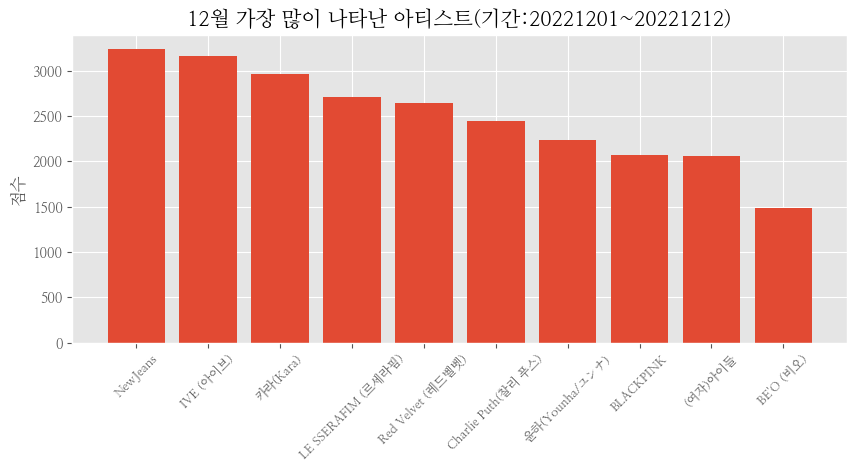

In [ ]:
import matplotlib.pyplot as plt
import platform

plt.rc('font', family = "NanumMyeongjo")

plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
plt.xticks(size=9, rotation=45)
plt.bar(df_bugs_top.index, df_bugs_top["점수"])
plt.title(f"12월 가장 많이 나타난 아티스트(기간:{sdt}~{edt})", size=15)
plt.ylabel("점수")
plt.show()

In [ ]:
df_bugs_values = df_bugs.groupby(["아티스트","날짜"]).sum().sort_values("점수", ascending=False)

/tmp/ipykernel_511/886951807.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bugs_values = df_bugs.groupby(["아티스트","날짜"]).sum().sort_values("점수", ascending=False)


In [ ]:
df_bugs_top.index

Index(['NewJeans', 'IVE (아이브)', '카라(Kara)', 'LE SSERAFIM (르세라핌)',
       'Red Velvet (레드벨벳)', 'Charlie Puth(찰리 푸스)', '윤하(Younha/ユンナ)',
       'BLACKPINK', '(여자)아이들', 'BE'O (비오)'],
      dtype='object', name='아티스트')

In [ ]:
df_bugs_values_top = df_bugs_values.loc[df_bugs_top.index]

In [ ]:
df_bugs_values_top

점수
아티스트      날짜           
NewJeans  20221210  274
          20221211  272
          20221212  272
          20221202  272
          20221203  271
...                 ...
BE'O (비오) 20221210  121
          20221207  121
          20221211  120
          20221212  120
          20221204  120

[120 rows x 1 columns]

In [ ]:
df_bugs_values_top = df_bugs_values_top.reset_index()

In [ ]:
df_bugs_values_top_pivot = df_bugs_values_top.pivot("아티스트","날짜","점수")

/tmp/ipykernel_511/2688928874.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_bugs_values_top_pivot = df_bugs_values_top.pivot("아티스트","날짜","점수")


In [ ]:
df_bugs_values_top_pivot

날짜,20221201,20221202,20221203,20221204,20221205,20221206,20221207,20221208,20221209,20221210,20221211,20221212
아티스트,,,,,,,,,,,,
(여자)아이들,178,182,175,169,168,166,168,168,173,173,168,168
BE'O (비오),133,128,122,120,125,127,121,123,125,121,120,120
BLACKPINK,176,176,174,169,170,173,171,172,173,171,170,170
Charlie Puth(찰리 푸스),202,207,202,203,196,203,205,205,205,208,207,207
IVE (아이브),265,268,267,262,262,260,261,262,264,265,265,265
LE SSERAFIM (르세라핌),238,228,225,230,229,228,222,229,220,213,222,222
NewJeans,270,272,271,265,266,269,267,267,270,274,272,272
Red Velvet (레드벨벳),370,294,237,244,235,223,212,196,169,143,160,160
윤하(Younha/ユンナ),197,187,187,187,184,185,184,185,185,185,185,185


<AxesSubplot: xlabel='아티스트'>

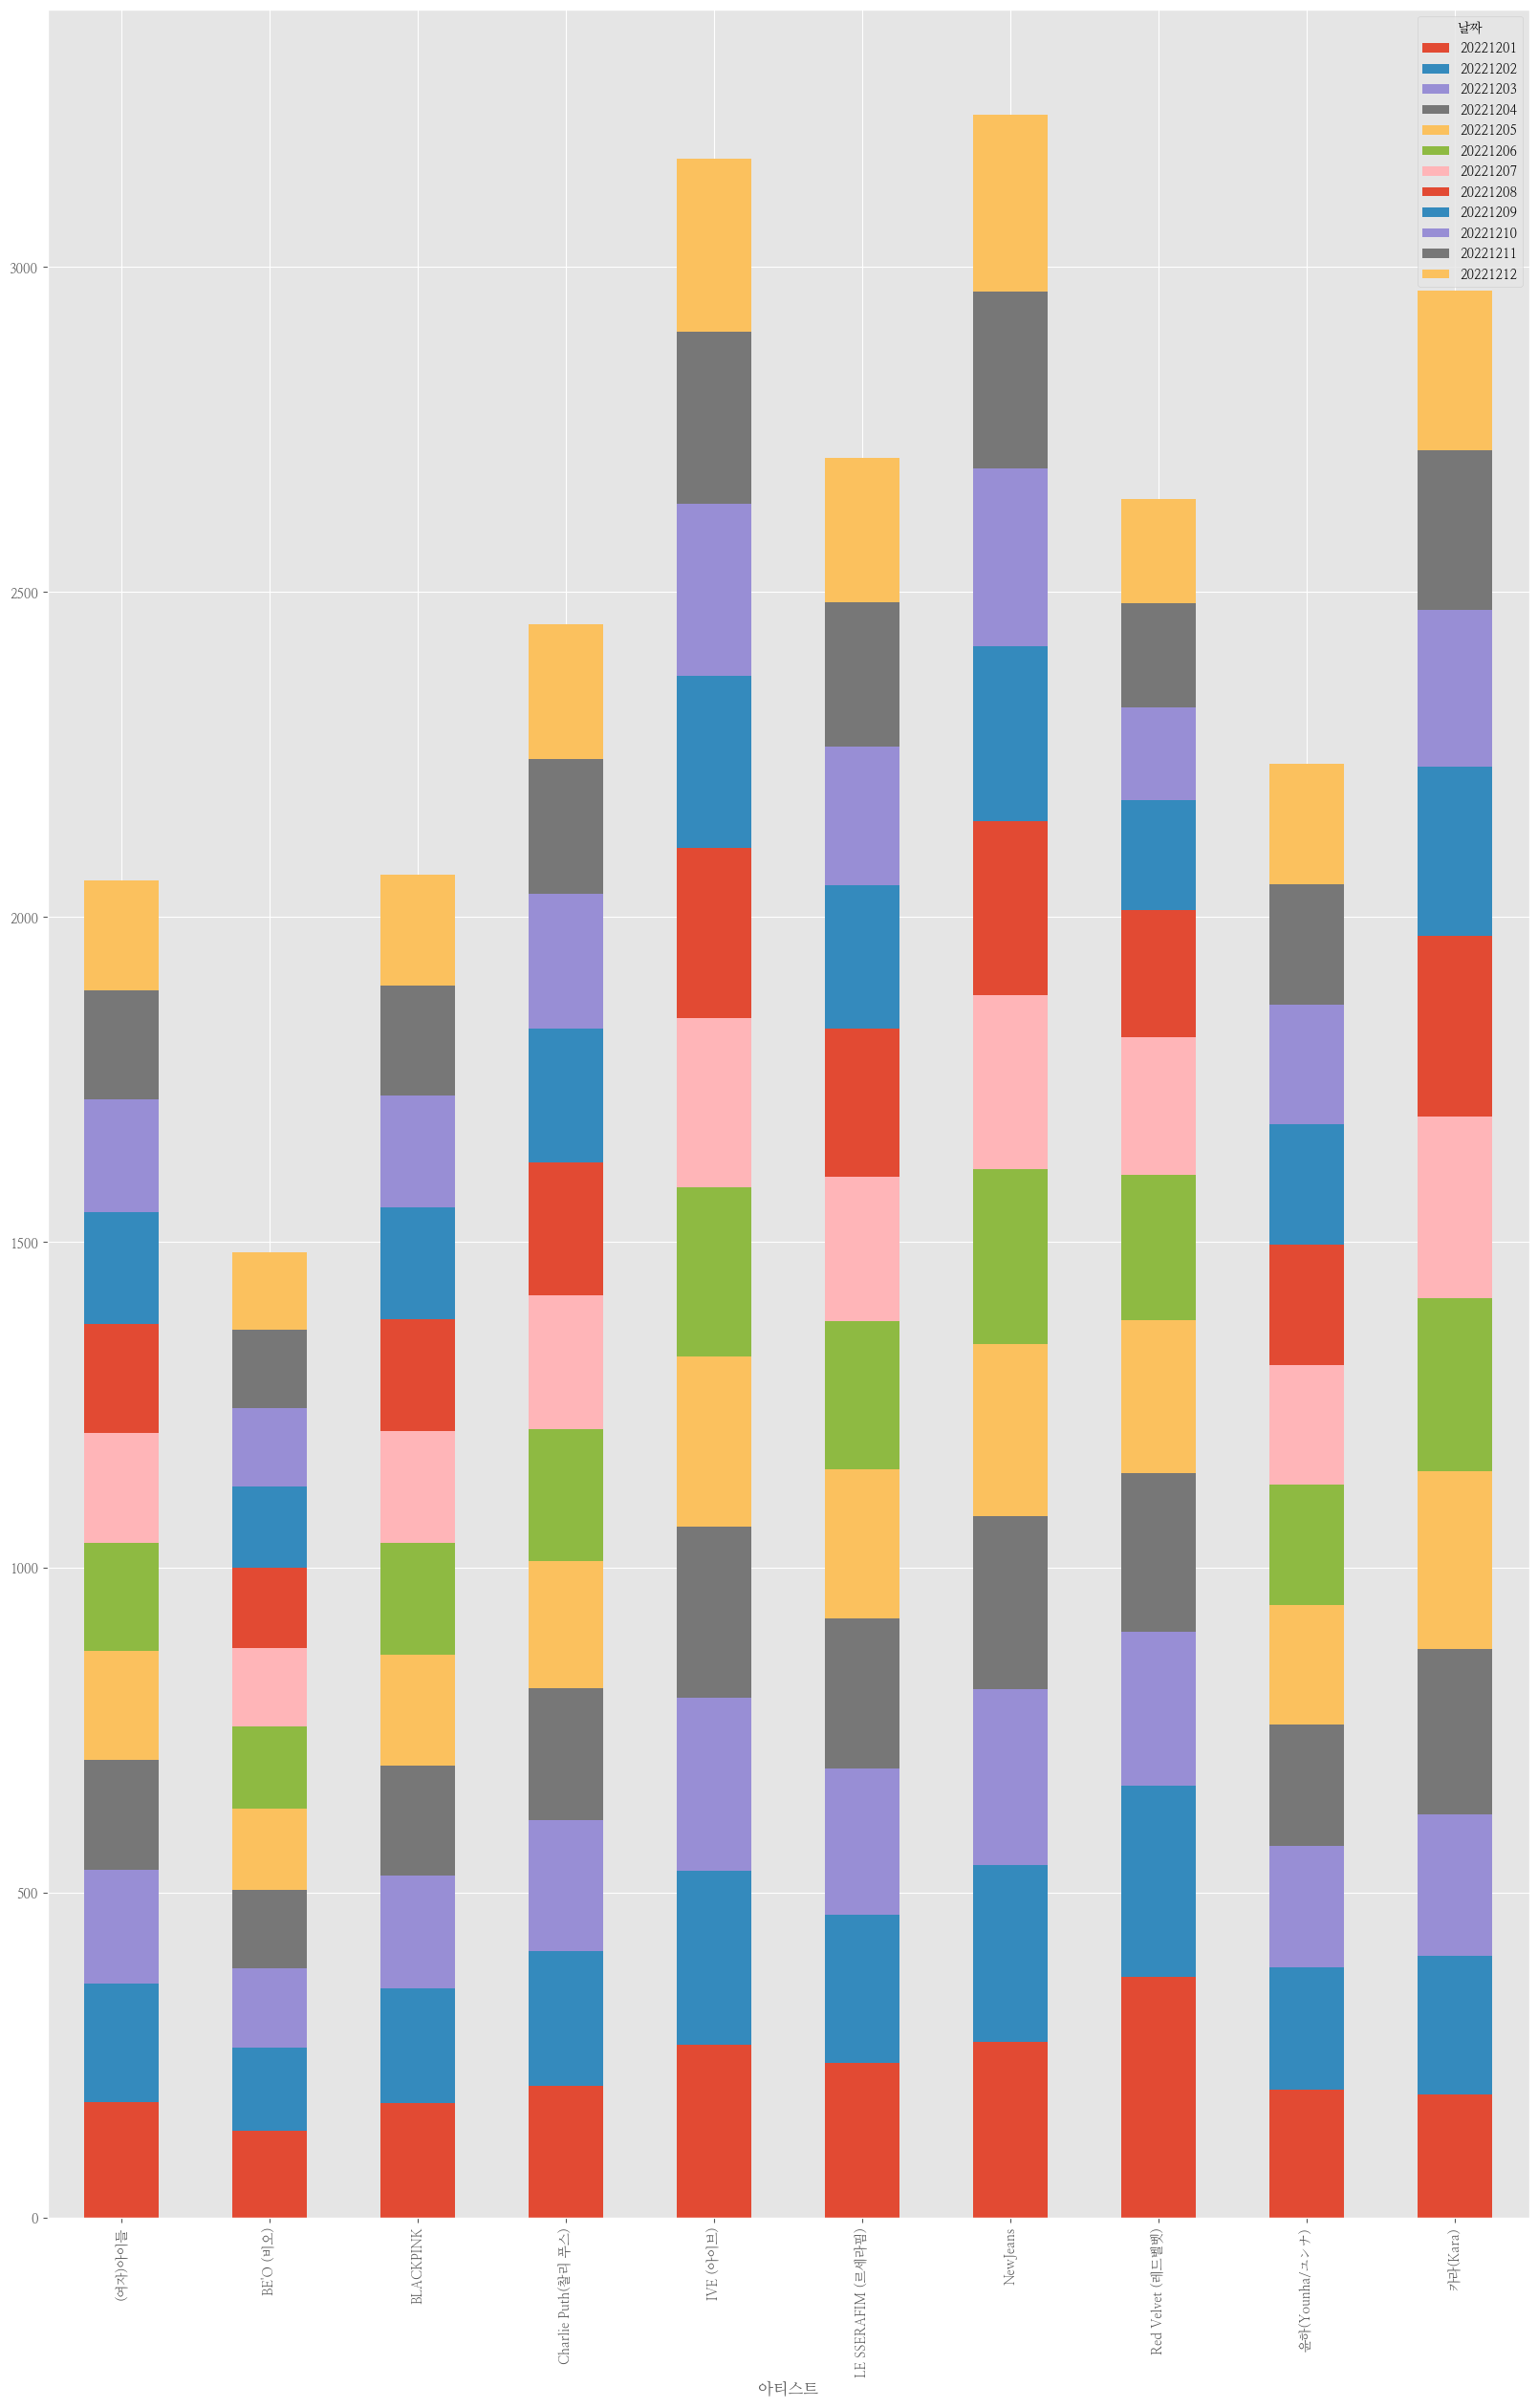

In [ ]:
df_bugs_values_top_pivot.plot(kind="bar", stacked=True, figsize=(20, 30)) 